In [29]:
#Import libraries used in assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
data = pd.read_csv("Datasets/uncleandata.csv")

In [31]:
#1 Print number of rows and columns
data.shape

(15099, 11)

In [32]:
#2 Print the names of the columns
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [33]:
#4 Show the amount of duplicates in the dataset
data.duplicated().sum()

2840

In [34]:
#5 removing duplicates from the data
data = data.drop_duplicates()

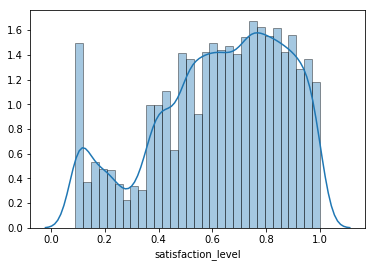

In [35]:
#6 Printing the distributions of each feature
plt.rcParams["patch.force_edgecolor"] = True
sb.distplot(data['satisfaction_level'])

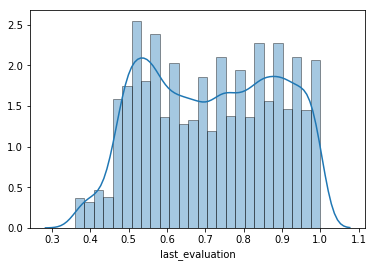

In [36]:
sb.distplot(data['last_evaluation'])

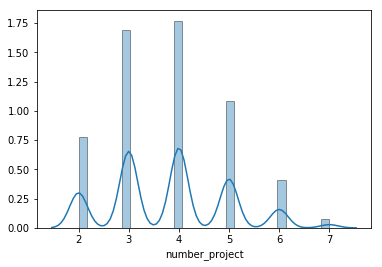

In [37]:
sb.distplot(data['number_project'])

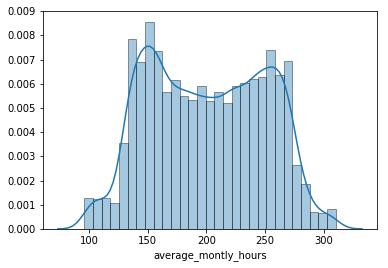

In [38]:
sb.distplot(data['average_montly_hours'].dropna())

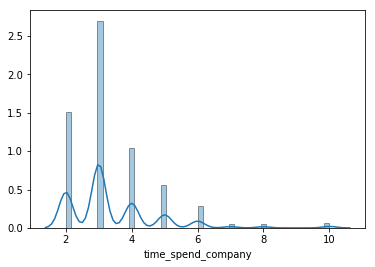

In [39]:
sb.distplot(data['time_spend_company'].dropna())

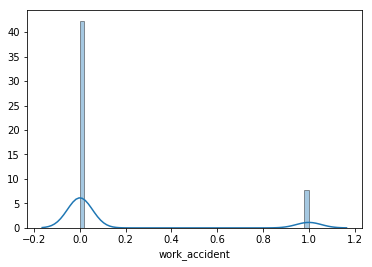

In [40]:
sb.distplot(data['work_accident'])

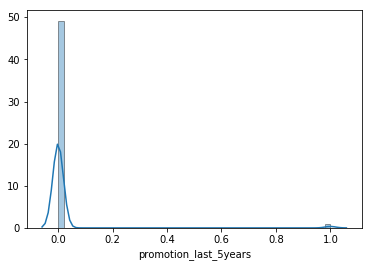

In [41]:
sb.distplot(data['promotion_last_5years'])

In [42]:
data['salary'].value_counts()

low       5872
medium    5360
high      1027
Name: salary, dtype: int64

In [43]:
data['left'].value_counts()

no     10144
yes     2115
Name: left, dtype: int64

In [44]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,12259.000000,12259.000000,12259.000000,11891.000000,12109.000000,12259.000000,12259.000000
mean,0.628149,0.716666,3.804389,200.511732,3.380048,0.153928,0.016886
std,0.241893,0.168627,1.170172,48.843440,1.356414,0.360894,0.128848
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [45]:
#7 Print the number of missing values per column
data.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         150
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                12024
department                   0
salary                       0
dtype: int64

In [46]:
#8 Drop column with the largest number of missing values
data = data.drop(columns=['is_smoker'])

In [47]:
#8 Fill the remaining missing values with the mean of that column
values = {'average_montly_hours':data['average_montly_hours'].mean(), 'time_spend_company':data['time_spend_company'].mean()}
data = data.fillna(value=values)

In [48]:
#9 Show that no more columns contain missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [49]:
#10 Convert "yes" to 1 and "no" to 0 in the column "left"
data['left'] = data['left'].map({'yes':1,'no':0})

In [50]:
#11 Save the resulting data to a file
data.to_csv(r'Datasets/processedData.csv')

In [51]:
#12 Analyze the processed dataset for interesting information
data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.0,0.094,-0.14,-0.0078,-0.15,0.043,-0.36,0.02
last_evaluation,0.094,1.0,0.28,0.27,0.095,-0.0064,0.016,-0.0079
number_project,-0.14,0.28,1.0,0.34,0.18,-0.0056,0.035,-0.0019
average_montly_hours,-0.0078,0.27,0.34,1.0,0.1,-0.0097,0.07,-0.0077
time_spend_company,-0.15,0.095,0.18,0.1,1.0,0.0038,0.16,0.053
work_accident,0.043,-0.0064,-0.0056,-0.0097,0.0038,1.0,-0.13,0.028
left,-0.36,0.016,0.035,0.07,0.16,-0.13,1.0,-0.045
promotion_last_5years,0.02,-0.0079,-0.0019,-0.0077,0.053,0.028,-0.045,1.0


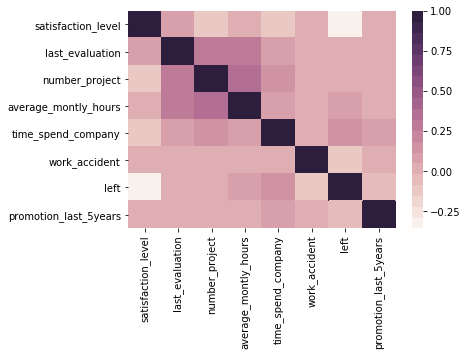

In [52]:
ax = sb.heatmap(data.corr(), cmap=sb.cubehelix_palette(20, light =0.95,dark = 0.15))

In [55]:
data_salaryGroup = data.groupby(['salary'])

In [56]:
data_salaryGroup.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [62]:
data_leftGroup = data.groupby(['left'])

In [63]:
data_leftGroup.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

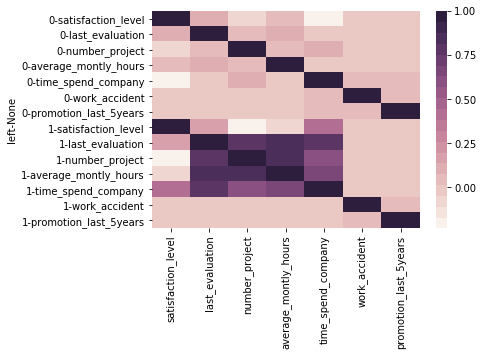

In [64]:
ax = sb.heatmap(data_leftGroup.corr(), cmap=sb.cubehelix_palette(20, light =0.95,dark = 0.15))

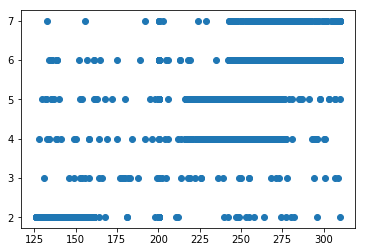

In [66]:
plt.scatter(data_hasLeft.average_montly_hours,data_hasLeft.number_project)

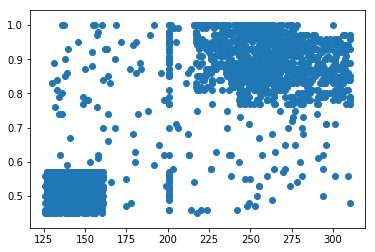

In [60]:
plt.scatter(data_hasLeft.average_montly_hours,data_hasLeft.last_evaluation)

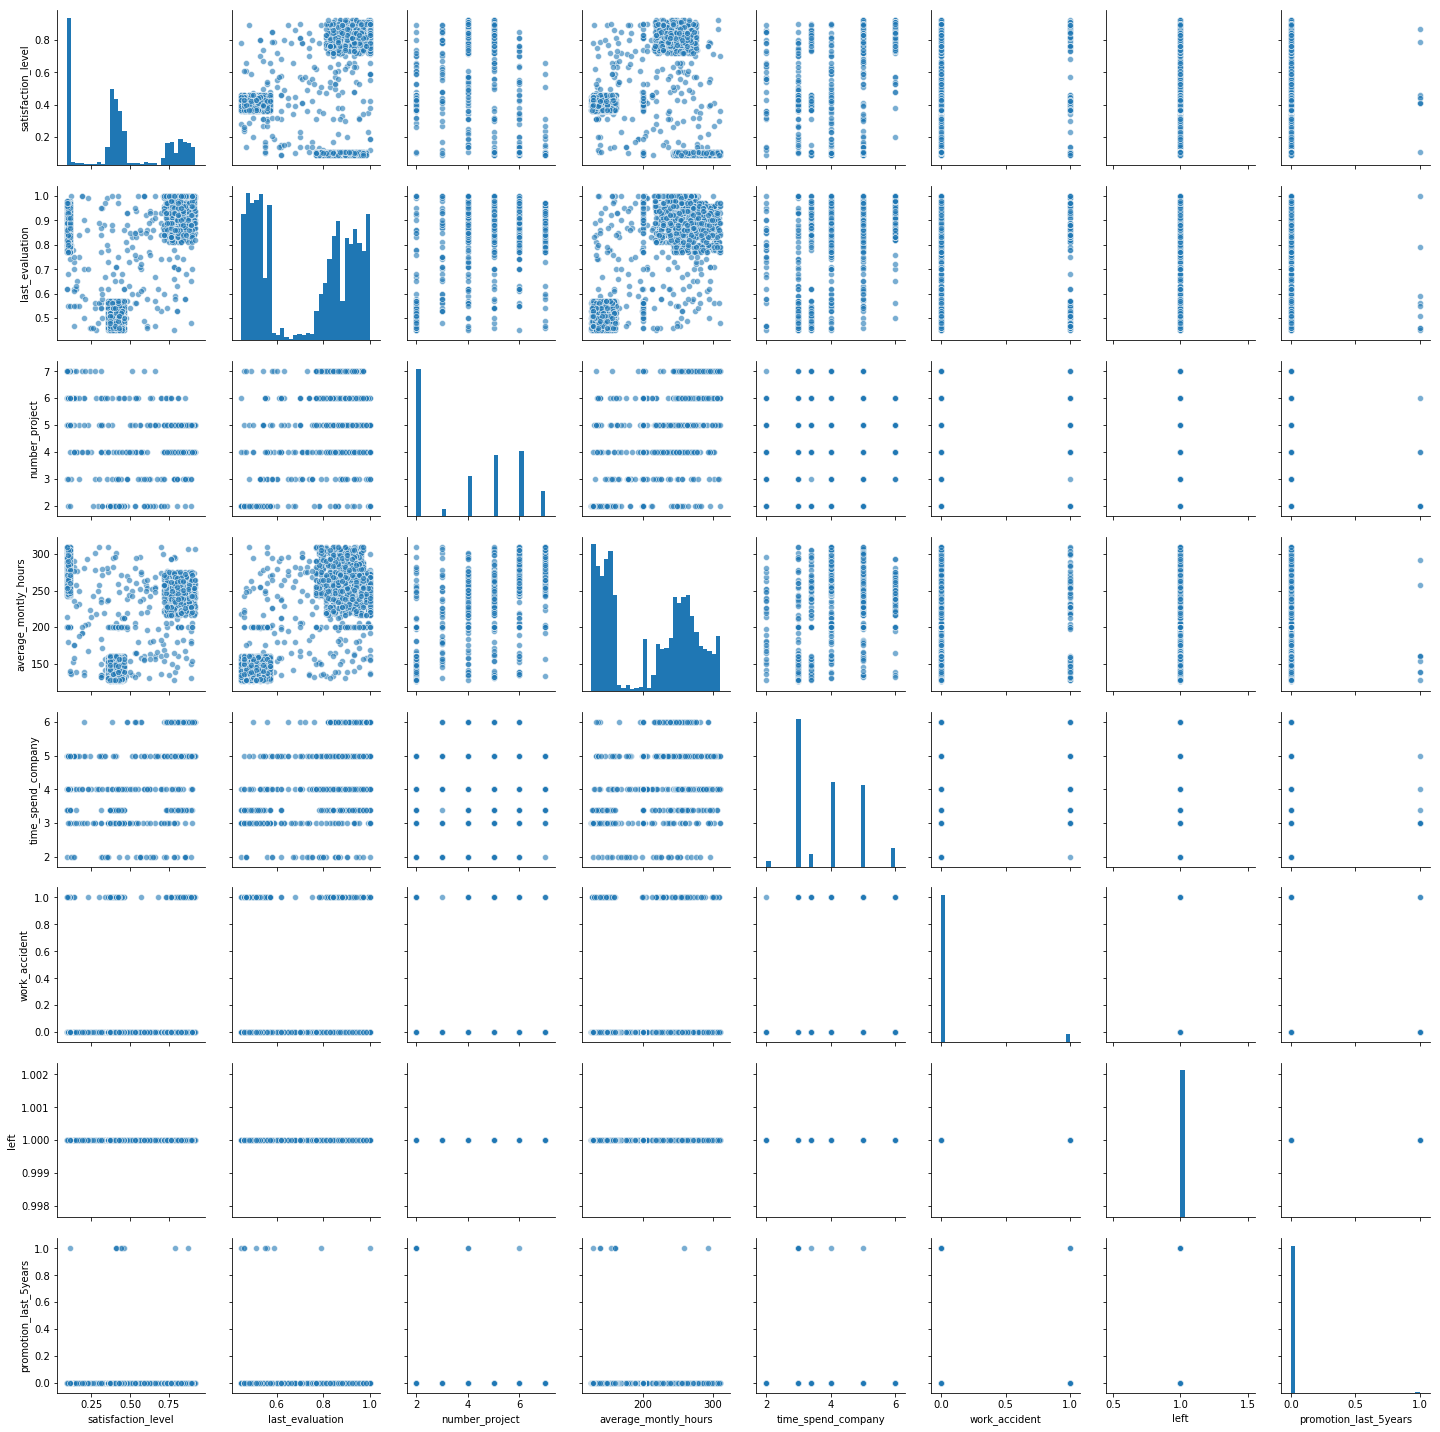

In [61]:
sb.pairplot(data_hasLeft, plot_kws={'alpha': 0.6}, diag_kws={'bins':30})

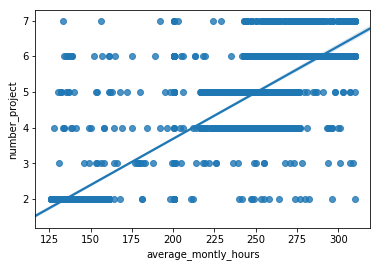

In [66]:
sb.regplot(data_hasLeft.average_montly_hours, data_hasLeft.number_project)